In [1]:
import tensorflow as tf
from keras.layers import Input, Dense, concatenate, BatchNormalization
from keras.models import Model
from keras.datasets import cifar10
from keras.optimizers import Adam, SGD
from keras.regularizers import l1,l2
from skimage.color import rgb2gray, gray2rgb, rgb2hsv, hsv2rgb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# Load Dataset and Preprocessing

In [2]:
# load the dataset
(xtrain, _), (xtest, _) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.

xtrain_red = xtrain[:,:,:,0]
xtrain_green = xtrain[:,:,:,1] 
xtrain_blue = xtrain[:,:,:,2]

xtest_red = xtest[:,:,:,0]
xtest_green = xtest[:,:,:,1] 
xtest_blue = xtest[:,:,:,2]

xtrain_red = xtrain_red.reshape(len(xtrain_red), np.prod(xtrain_red.shape[1:]))
xtrain_green = xtrain_green.reshape(len(xtrain_green), np.prod(xtrain_green.shape[1:]))
xtrain_blue = xtrain_blue.reshape(len(xtrain_blue), np.prod(xtrain_blue.shape[1:]))

xtest_red = xtest_red.reshape(len(xtest_red), np.prod(xtest_red.shape[1:]))
xtest_green = xtest_green.reshape(len(xtest_green), np.prod(xtest_green.shape[1:]))
xtest_blue = xtest_blue.reshape(len(xtest_blue), np.prod(xtest_blue.shape[1:]))

# Define Model

In [0]:
input_layer = xtrain_red.shape[1]
hid_layer1 = 576
hid_layer2 = 256
hid_layer3 = 64
hid_layer4 = 10
hid_layer5 = hid_layer3
hid_layer6 = hid_layer2
hid_layer7 = hid_layer1
output_layer = input_layer
print(xtrain_red.shape)
print(xtest_red.shape)

(50000, 1024)
(10000, 1024)


In [0]:
input_img_red = Input(shape=(input_layer,))
input_img_green = Input(shape=(input_layer,))
input_img_blue = Input(shape=(input_layer,))

W0903 15:21:39.957112 139836759164800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0903 15:21:39.993672 139836759164800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



In [0]:
# network architecture
# vanilla autoencoder with fully-connected layer
# RED
x = Dense(units = hid_layer1, activation='relu')(input_img_red)
# x = BatchNormalization()(x)
x = Dense(units = hid_layer2, activation='relu')(x)
# x = BatchNormalization()(x)
x = Dense(units = hid_layer3, activation='relu')(x)
# x = BatchNormalization()(x)

# GREEN
y = Dense(units = hid_layer1, activation='relu')(input_img_green)
# y = BatchNormalization()(y)
y = Dense(units = hid_layer2, activation='relu')(y)
# y = BatchNormalization()(y)
y = Dense(units = hid_layer3, activation='relu')(y)
# y = BatchNormalization()(y)

# BLUE
z = Dense(units = hid_layer1, activation='relu')(input_img_blue)
# z = BatchNormalization()(z)
z = Dense(units = hid_layer2, activation='relu')(z)
# z = BatchNormalization()(z)
z = Dense(units = hid_layer3, activation='relu')(z)
# z = BatchNormalization()(z)

encoded_red = Dense(units = hid_layer4, activation='relu',kernel_regularizer = l2(3e-5), activity_regularizer = l1(10e-12))(x)
encoded_green = Dense(units = hid_layer4, activation='relu',kernel_regularizer = l2(3e-5), activity_regularizer = l1(10e-12))(y)
encoded_blue = Dense(units = hid_layer4, activation='relu',kernel_regularizer = l2(3e-5), activity_regularizer = l1(10e-12))(z)

# RED
x = Dense(units = hid_layer5, activation = 'relu')(encoded_red)
# x = BatchNormalization()(x)
x = Dense(units = hid_layer6, activation='relu')(x)
# x = BatchNormalization()(x)
x = Dense(units = hid_layer7, activation='relu')(x)
# x = BatchNormalization()(x)

# GREEN
y = Dense(units = hid_layer5, activation = 'relu')(encoded_green)
# y = BatchNormalization()(y)
y = Dense(units = hid_layer6, activation='relu')(y)
# y = BatchNormalization()(y)
y = Dense(units = hid_layer7, activation='relu')(y)
# y = BatchNormalization()(y)

# BLUE
z = Dense(units = hid_layer5, activation = 'relu')(encoded_blue)
# z = BatchNormalization()(z)
z = Dense(units = hid_layer6, activation='relu')(z)
# z = BatchNormalization()(z)
z = Dense(units = hid_layer7, activation='relu')(z)
# z = BatchNormalization()(z)

decoded_red = Dense(units = output_layer, activation='sigmoid')(x)
decoded_green = Dense(units = output_layer, activation='sigmoid')(y)
decoded_blue = Dense(units = output_layer, activation='sigmoid')(z)

autoencoder_red = Model(input_img_red, decoded_red)
autoencoder_green = Model(input_img_green, decoded_green)
autoencoder_blue = Model(input_img_blue, decoded_blue)

encoder_red = Model(input_img_red, encoded_red)
encoder_green = Model(input_img_green, encoded_green)
encoder_blue = Model(input_img_blue, encoded_blue)

autoencoder_red.compile(optimizer= Adam(lr=1e-5), loss='mean_absolute_error')
autoencoder_green.compile(optimizer= Adam(lr=1e-5), loss='mean_absolute_error')
autoencoder_blue.compile(optimizer= Adam(lr=1e-5), loss='mean_absolute_error')

W0903 15:21:45.444038 139836759164800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0903 15:21:45.815966 139836759164800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



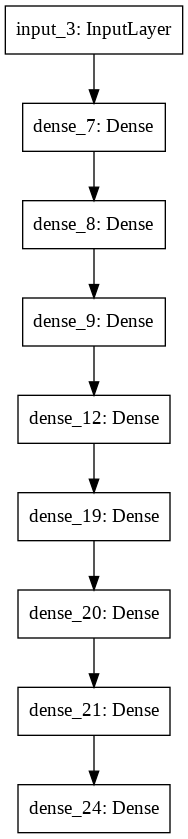

In [0]:
from keras.utils import plot_model
plot_model(autoencoder_red, to_file='model_red.png')
plot_model(autoencoder_green, to_file='model_green.png')
plot_model(autoencoder_blue, to_file='model_blue.png')

# Train Model

In [0]:
# train the model
history_red = autoencoder_red.fit(xtrain_red, xtrain_red,
                          epochs=100,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(xtest_red, xtest_red))

W0903 15:21:51.861227 139836759164800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0903 15:21:52.095539 139836759164800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1020: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 177us/step - loss: 0.2000 - val_loss: 0.1902
Epoch 2/100
50000/50000 [==============================] - 4s 87us/step - loss: 0.1801 - val_loss: 0.1669
Epoch 3/100
50000/50000 [==============================] - 4s 87us/step - loss: 0.1645 - val_loss: 0.1615
Epoch 4/100
50000/50000 [==============================] - 4s 86us/step - loss: 0.1607 - val_loss: 0.1585
Epoch 5/100
50000/50000 [==============================] - 4s 86us/step - loss: 0.1573 - val_loss: 0.1547
Epoch 6/100
50000/50000 [==============================] - 4s 87us/step - loss: 0.1526 - val_loss: 0.1492
Epoch 7/100
50000/50000 [==============================] - 4s 86us/step - loss: 0.1465 - val_loss: 0.1429
Epoch 8/100
50000/50000 [==============================] - 4s 86us/step - loss: 0.1406 - val_loss: 0.1381
Epoch 9/100
50000/50000 [==============================] - 4s 86us/step - loss: 0.1368 - val_loss: 0.

In [0]:
# train the model
history_green = autoencoder_green.fit(xtrain_green, xtrain_green,
                                epochs=100,
                                batch_size=128,
                                shuffle=True,
                                validation_data=(xtest_green, xtest_green))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 100us/step - loss: 0.1964 - val_loss: 0.1855
Epoch 2/100
50000/50000 [==============================] - 4s 89us/step - loss: 0.1770 - val_loss: 0.1649
Epoch 3/100
50000/50000 [==============================] - 4s 88us/step - loss: 0.1623 - val_loss: 0.1594
Epoch 4/100
50000/50000 [==============================] - 4s 89us/step - loss: 0.1577 - val_loss: 0.1544
Epoch 5/100
50000/50000 [==============================] - 4s 88us/step - loss: 0.1514 - val_loss: 0.1471
Epoch 6/100
50000/50000 [==============================] - 4s 86us/step - loss: 0.1436 - val_loss: 0.1394
Epoch 7/100
50000/50000 [==============================] - 4s 87us/step - loss: 0.1359 - val_loss: 0.1322
Epoch 8/100
50000/50000 [==============================] - 4s 88us/step - loss: 0.1304 - val_loss: 0.1282
Epoch 9/100
50000/50000 [==============================] - 4s 88us/step - loss: 0.1277 - val_loss: 0.

In [0]:
# train the model
history_blue = autoencoder_blue.fit(xtrain_blue, xtrain_blue,
                                epochs=100,
                                batch_size=128,
                                shuffle=True,
                                validation_data=(xtest_blue, xtest_blue))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 100us/step - loss: 0.2181 - val_loss: 0.2012
Epoch 2/100
50000/50000 [==============================] - 4s 87us/step - loss: 0.1861 - val_loss: 0.1745
Epoch 3/100
50000/50000 [==============================] - 4s 88us/step - loss: 0.1668 - val_loss: 0.1592
Epoch 4/100
50000/50000 [==============================] - 4s 88us/step - loss: 0.1528 - val_loss: 0.1467
Epoch 5/100
50000/50000 [==============================] - 4s 88us/step - loss: 0.1417 - val_loss: 0.1369
Epoch 6/100
50000/50000 [==============================] - 4s 88us/step - loss: 0.1344 - val_loss: 0.1318
Epoch 7/100
50000/50000 [==============================] - 4s 88us/step - loss: 0.1309 - val_loss: 0.1298
Epoch 8/100
50000/50000 [==============================] - 4s 88us/step - loss: 0.1294 - val_loss: 0.1288
Epoch 9/100
50000/50000 [==============================] - 4s 87us/step - loss: 0.1286 - val_loss: 0.

dict_keys(['val_loss', 'loss'])


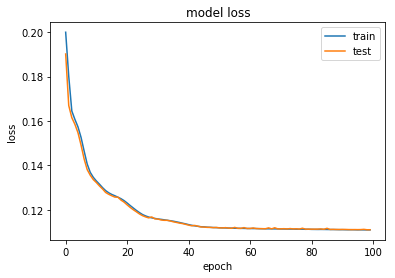

In [0]:
# list all data in history
print(history_red.history.keys())
# summarize history for loss
plt.plot(history_red.history['loss'])
plt.plot(history_red.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

dict_keys(['val_loss', 'loss'])


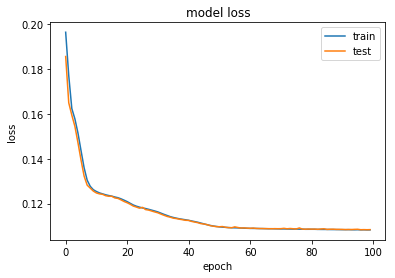

In [0]:
# list all data in history
print(history_green.history.keys())
# summarize history for loss
plt.plot(history_green.history['loss'])
plt.plot(history_green.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

dict_keys(['val_loss', 'loss'])


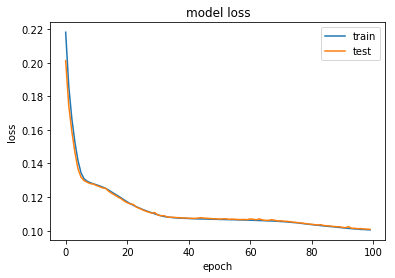

In [0]:
# list all data in history
print(history_blue.history.keys())
# summarize history for loss
plt.plot(history_blue.history['loss'])
plt.plot(history_blue.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
autoencoder_red.save('autoencoder_baseline_red.h5')
autoencoder_green.save('autoencoder_baseline_green.h5')
autoencoder_blue.save('autoencoder_baseline_blue.h5')

# (Optional) Load Pre-trained Model

In [4]:
from keras.models import load_model

autoencoder_red = load_model('autoencoder_baseline_red.h5')
autoencoder_green = load_model('autoencoder_baseline_green.h5')
autoencoder_blue = load_model('autoencoder_baseline_blue.h5')
encoder_red = Model(inputs = autoencoder_red.input, outputs = autoencoder_red.get_layer(index = 4).output)
encoder_green = Model(inputs = autoencoder_green.input, outputs = autoencoder_green.get_layer(index = 4).output)
encoder_blue = Model(inputs = autoencoder_blue.input, outputs = autoencoder_blue.get_layer(index = 4).output)

# Show Reconstruction Output

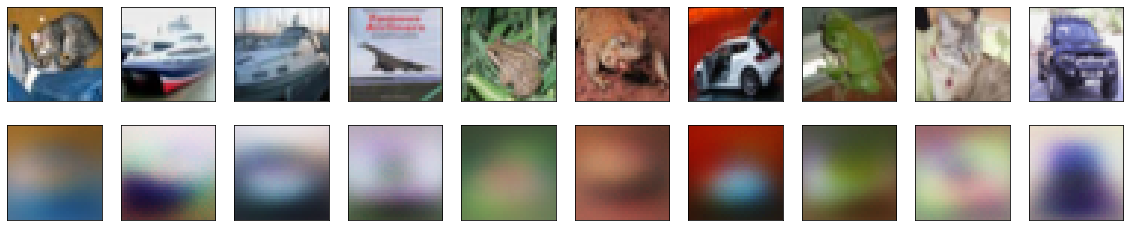

In [5]:
# show the result at the decoder output
decoded_imgs_red = autoencoder_red.predict(xtest_red)
decoded_imgs_green = autoencoder_green.predict(xtest_green)
decoded_imgs_blue = autoencoder_blue.predict(xtest_blue)

counter = 0
n = 10
test_imgs = np.zeros((32,32,3))
dec_imgs = np.zeros((32,32,3))

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    test_imgs[:,:,0] = xtest_red[counter + i].reshape(32, 32)
    test_imgs[:,:,1] = xtest_green[counter + i].reshape(32, 32)
    test_imgs[:,:,2] = xtest_blue[counter + i].reshape(32, 32)

    plt.imshow(test_imgs)
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    dec_imgs[:,:,0] = decoded_imgs_red[counter + i].reshape(32, 32)
    dec_imgs[:,:,1] = decoded_imgs_green[counter + i].reshape(32, 32)
    dec_imgs[:,:,2] = decoded_imgs_blue[counter + i].reshape(32, 32)

    plt.imshow(dec_imgs)
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

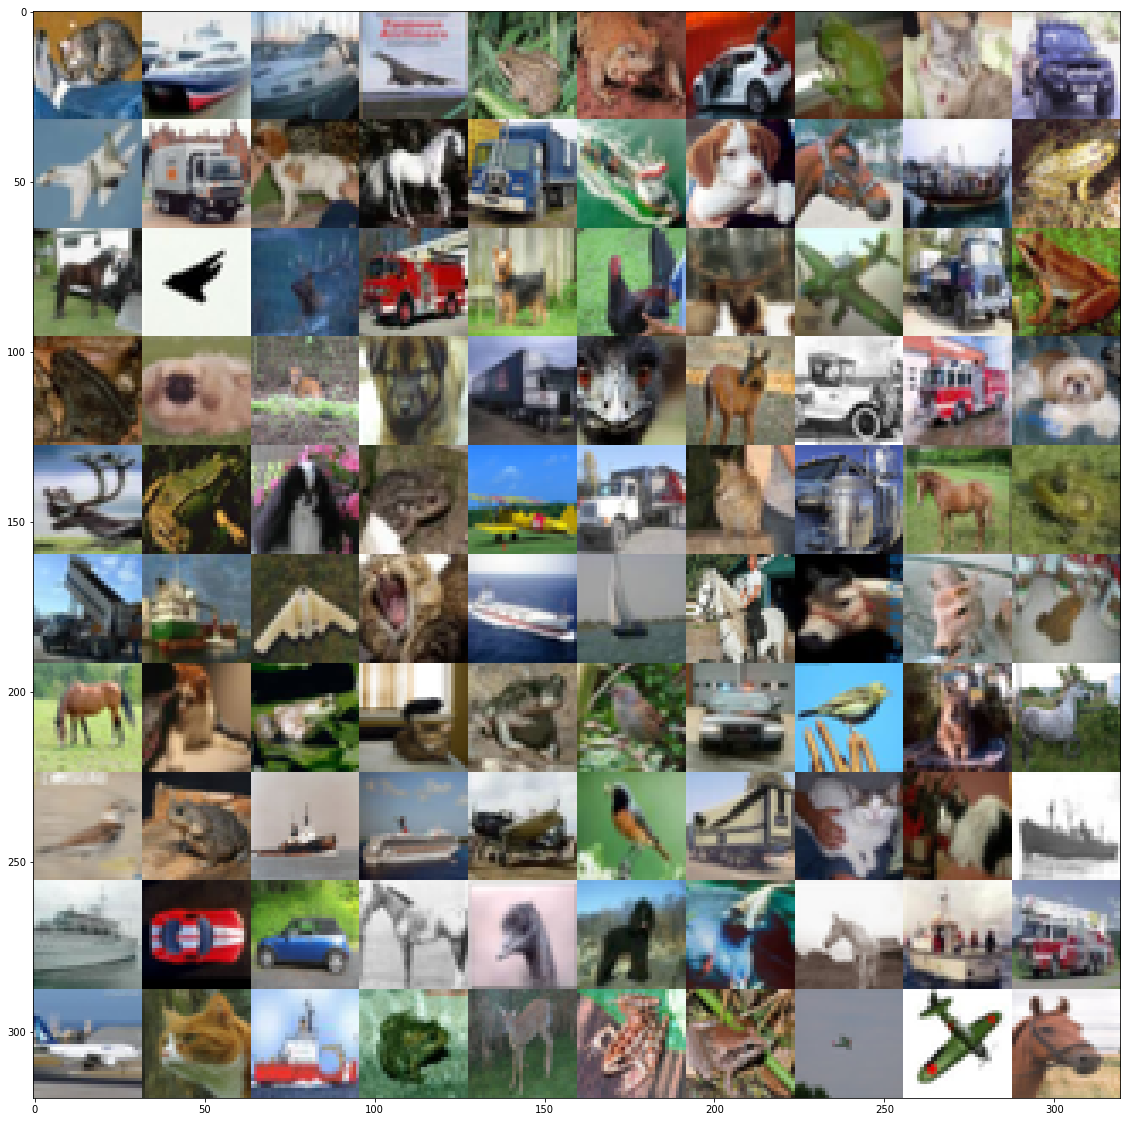

In [0]:
# display test images generated from latent vector
n = 10
img_size = 32
img_chns = 3
figure = np.zeros((img_size * n, img_size * n, img_chns))
test_imgs = np.zeros((32,32,3))
counter = 0

for i in range(n):
    for j in range(n):
      test_imgs[:,:,0] = xtest_red[counter].reshape(32, 32)
      test_imgs[:,:,1] = xtest_green[counter].reshape(32, 32)
      test_imgs[:,:,2] = xtest_blue[counter].reshape(32, 32)

      figure[(i * img_size) : (i + 1) * img_size, (j * img_size) : (j + 1) * img_size] = test_imgs
      counter = counter + 1


plt.figure(figsize=(20, 20))
plt.imshow(figure)
plt.show()

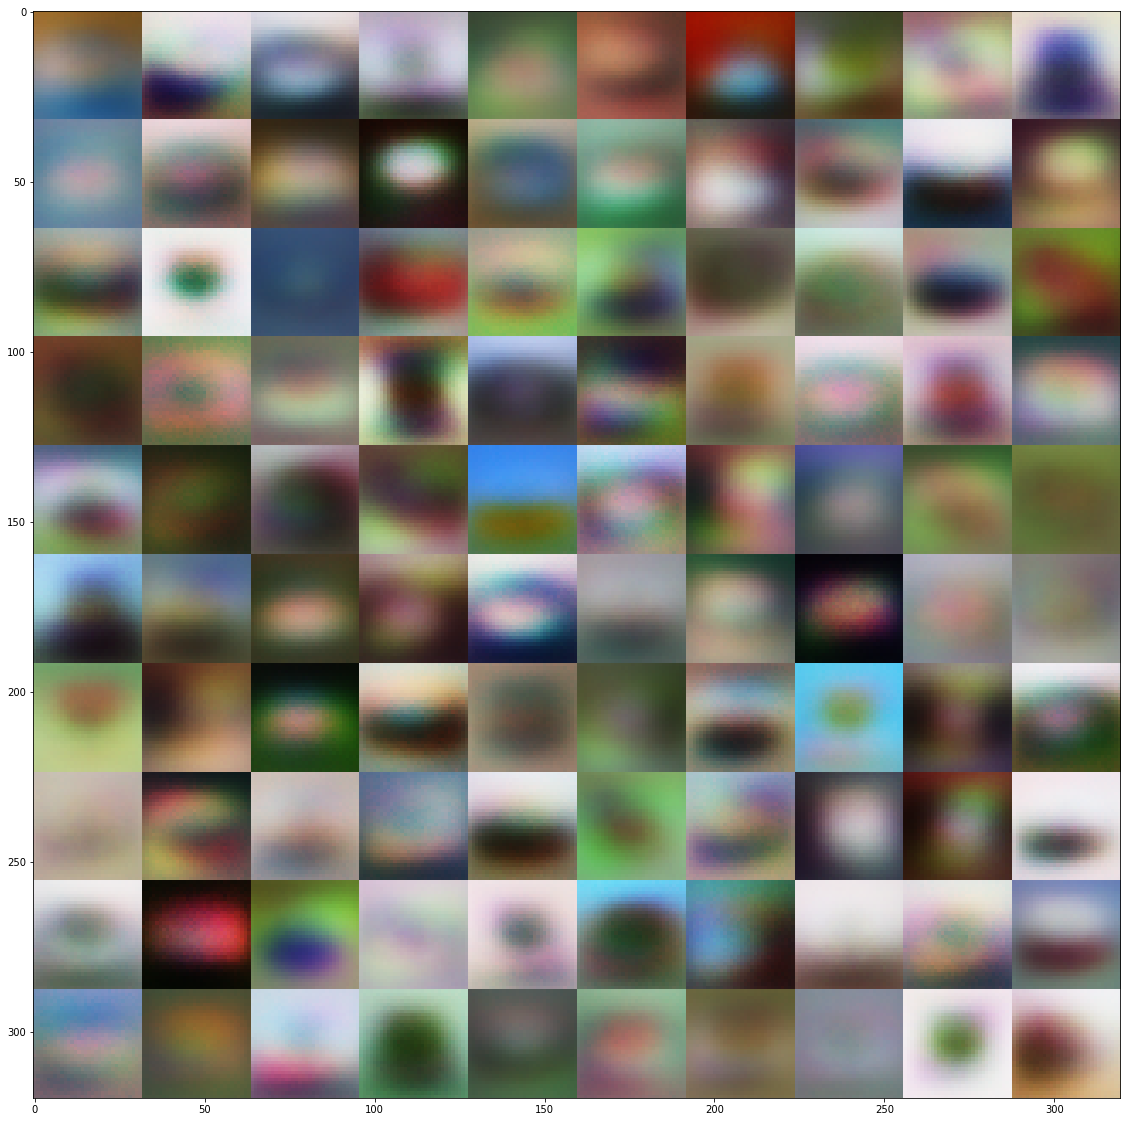

In [6]:
# display reconstructed images generated from latent vector
n = 10
img_size = 32
img_chns = 3
figure = np.zeros((img_size * n, img_size * n, img_chns))
dec_imgs = np.zeros((32,32,3))
counter = 0

for i in range(n):
    for j in range(n):
      dec_imgs[:,:,0] = decoded_imgs_red[counter].reshape(32, 32)
      dec_imgs[:,:,1] = decoded_imgs_green[counter].reshape(32, 32)
      dec_imgs[:,:,2] = decoded_imgs_blue[counter].reshape(32, 32)

      figure[(i * img_size) : (i + 1) * img_size, (j * img_size) : (j + 1) * img_size] = dec_imgs
      counter = counter + 1


plt.figure(figsize=(20, 20))
plt.imshow(figure)
plt.show()

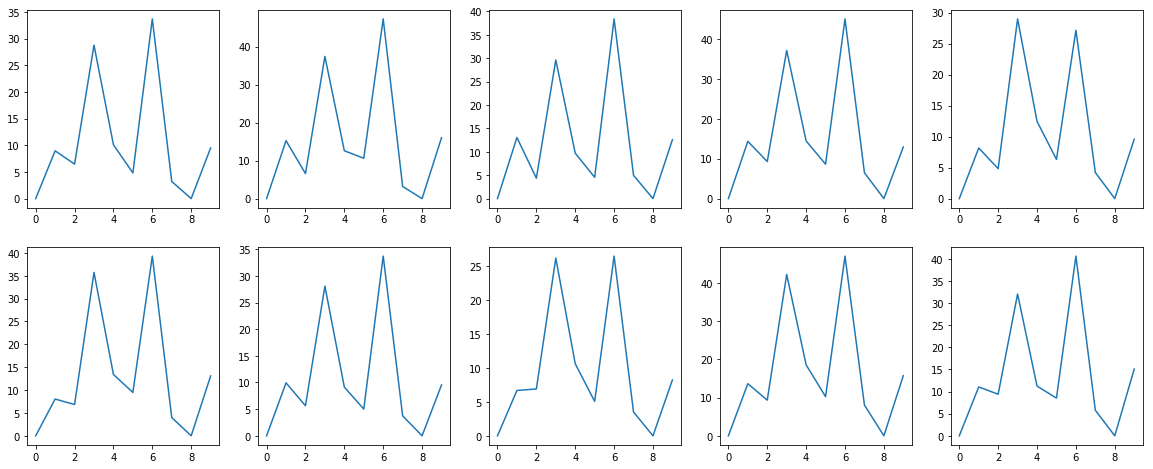

In [0]:
# show the representation at the bottleneck
encoded_imgs_red = encoder_red.predict(xtest_red)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(2, 5, i + 1)
    plt.plot(encoded_imgs_red[counter + i])
    # plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
plt.show()

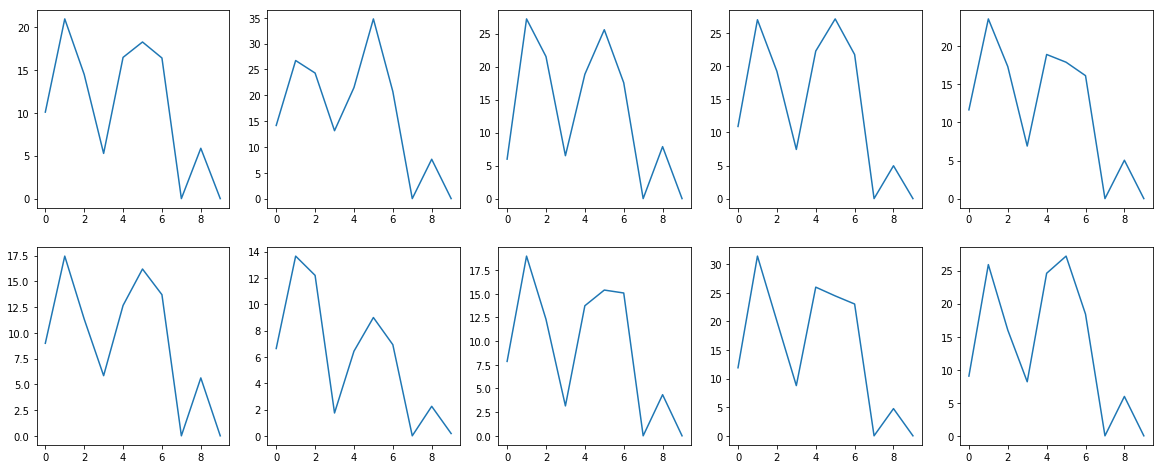

In [0]:
# show the representation at the bottleneck
encoded_imgs_green = encoder_green.predict(xtest_green)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(2, 5, i + 1)
    plt.plot(encoded_imgs_green[counter + i])
    # plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
plt.show()

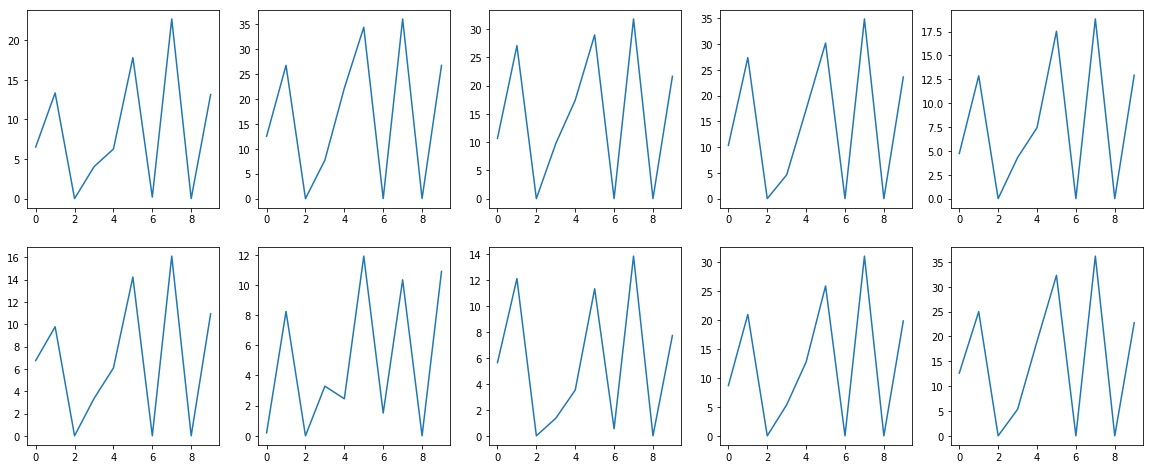

In [0]:
# show the representation at the bottleneck
encoded_imgs_blue = encoder_blue.predict(xtest_blue)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(2, 5, i + 1)
    plt.plot(encoded_imgs_blue[counter + i])
    # plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
plt.show()

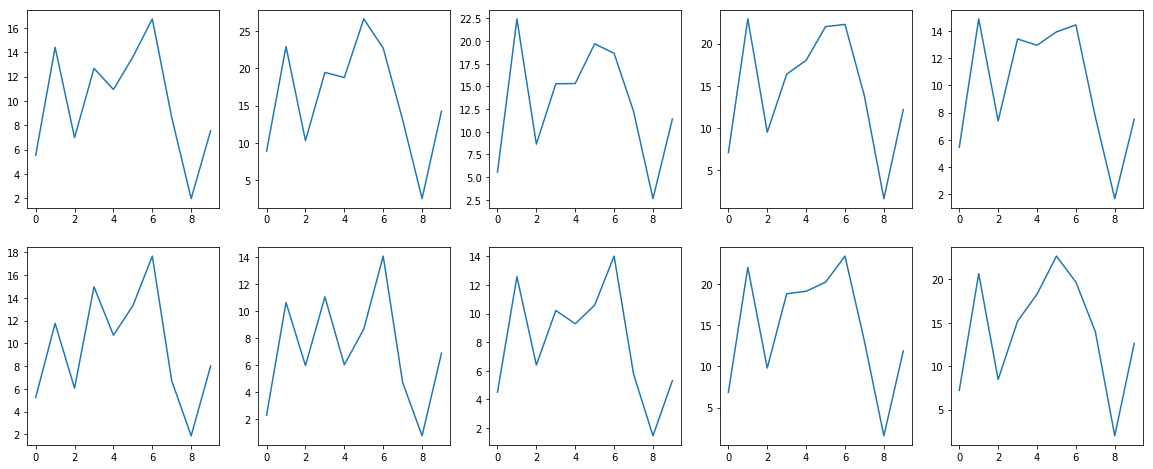

In [0]:
sum_encoded = (encoded_imgs_red + encoded_imgs_green + encoded_imgs_blue)/3.

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(2, 5, i + 1)
    plt.plot(sum_encoded[counter + i])
    # plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
plt.show()

(array([404., 271., 156.,  97.,  31.,  32.,  15.,   3.,   9.,   6.]),
 array([5.0663948e-06, 6.6387989e-02, 1.3277091e-01, 1.9915383e-01,
        2.6553676e-01, 3.3191967e-01, 3.9830258e-01, 4.6468550e-01,
        5.3106844e-01, 5.9745133e-01, 6.6383427e-01], dtype=float32),
 <a list of 10 Patch objects>)

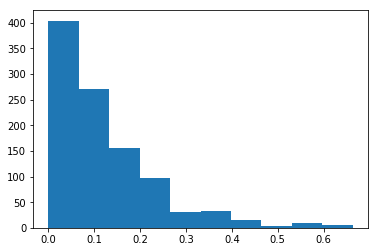

In [0]:
err_red = np.sqrt(np.square(xtest_red[1] - decoded_imgs_red[1]))
plt.hist(err_red)

(array([353., 285., 152.,  78.,  56.,  35.,  27.,  17.,  11.,  10.]),
 array([2.0301342e-04, 5.2428711e-02, 1.0465441e-01, 1.5688011e-01,
        2.0910580e-01, 2.6133150e-01, 3.1355721e-01, 3.6578289e-01,
        4.1800860e-01, 4.7023427e-01, 5.2245998e-01], dtype=float32),
 <a list of 10 Patch objects>)

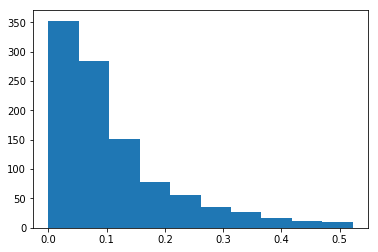

In [0]:
err_green = np.sqrt(np.square(xtest_green[1] - decoded_imgs_green[1]))
plt.hist(err_green)

(array([404., 271., 156.,  97.,  31.,  32.,  15.,   3.,   9.,   6.]),
 array([5.0663948e-06, 6.6387989e-02, 1.3277091e-01, 1.9915383e-01,
        2.6553676e-01, 3.3191967e-01, 3.9830258e-01, 4.6468550e-01,
        5.3106844e-01, 5.9745133e-01, 6.6383427e-01], dtype=float32),
 <a list of 10 Patch objects>)

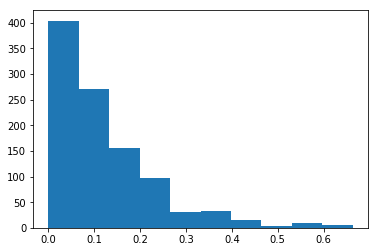

In [0]:
err_blue = np.sqrt(np.square(xtest_blue[1] - decoded_imgs_blue[1]))
plt.hist(err_red)